In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("../Dataset/insurance.csv")

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.drop(['sex'],axis=1,inplace=True)

In [9]:
new_df=df.drop(['smoker'],axis=1,inplace=True)

In [10]:
new_df=df.drop(['region'],axis=1,inplace=True)

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


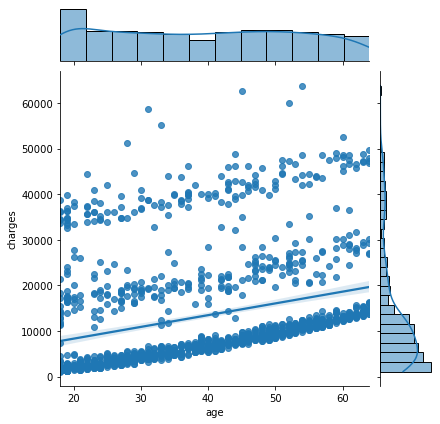

In [13]:
sns.jointplot(x=df['age'], y=df['charges'], data=df, kind='reg')

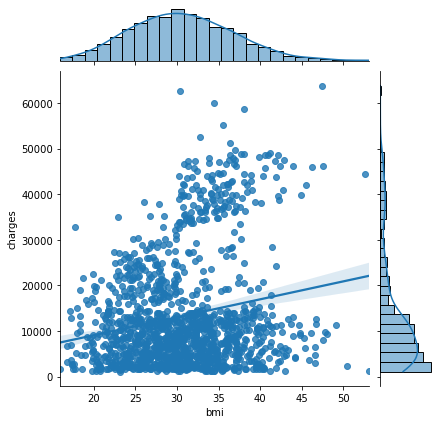

In [18]:
sns.jointplot(x=df['bmi'], y=df['charges'], data=df, kind='reg')

In [14]:
x=df["age"]
y=df["charges"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#reshape the data
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

Train - Predictors shape (1070, 1)
Test - Predictors shape (268, 1)
Train - Target shape (1070, 1)
Test - Target shape (268, 1)


0.06471793991136532

In [15]:
#finding MSE value with test data
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

104738912.49367198

In [16]:
# finding MSE value with train data

# from sklearn.metrics import mean_squared_error
# y_preds=model.predict(x_train)
# mse=mean_squared_error(y_train,y_preds)
# mse

In [17]:
r2_score(y_test,y_preds)

0.06471793991136532

In [19]:
# calculate co-efficient
def theta_calc(x_train, y_train): 
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)

    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)

    return theta

In [20]:
def predict_func(slope,intercept,x_test):
    
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [21]:
def mse_calc(prediction, y_test):
    
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [22]:
def rsq(prediction, y_test):

    total_data = len(prediction)
    
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2

In [23]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model',slope)

Intercept of the model [3335.5307123]
Slope of the model [263.1652233]


In [24]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)

In [25]:
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

R squared value 0.0647179399113651


In [26]:
#MSE calculation
pred_df = pd.DataFrame(prediction)
pred_df.columns=['charges']
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)

Mean squared error of the model 104738912.49367201


In [27]:
error = (np.sum((prediction - y_test)**2))/len(prediction)
error

104738912.49367201